In [1]:
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
max_length = 0

In [3]:
y_rate, y_data = [[None] * 2] * 2

for i in range(2):
    file_path = os.sep.join([os.path.expanduser("~lewis"), "wave_test", "dataset", str(i + 1) + ".wav"]);
    y_rate[i], y_data[i] = wavfile.read(file_path)
    
    if y_data[i].shape[0] > max_length:
        max_length = y_data[i].shape[0]

/usr/local/lib/python3.4/dist-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [4]:
x_rate, x_data = [[None] * 4] * 2

for i in range(4):
    file_path = os.sep.join([os.path.expanduser("~lewis"), "wave_test", "dataset", "1", str(i + 1) + ".wav"]);
    x_rate[i], x_data[i] = wavfile.read(file_path)
    
    if x_data[i].shape[0] > max_length:
        max_length = x_data[i].shape[0]

/usr/local/lib/python3.4/dist-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [5]:
data_format = np.zeros([max_length])

for i, data in enumerate(y_data):
    tmp_format = np.array(data_format, copy=True)
    
    # 轉為單聲到，且切齊最常時間檔案
    tmp_format[:len(y_data[i])] = [i[0] for i in y_data[i]]
    
    y_data[i] = tmp_format.reshape(max_length)
    
y_data = np.array(y_data)

In [6]:
data_format = np.zeros([max_length])

for i, data in enumerate(x_data):
    tmp_format = np.array(data_format, copy=True)
    
    # 轉為單聲到，且切齊最常時間檔案
    tmp_format[:len(x_data[i])] = [i[0] for i in x_data[i]]
    
    x_data[i] = tmp_format.reshape(1, max_length)
    
x_data = np.array(x_data)

In [7]:
y_data.shape

(2, 28814)

In [8]:
x_data.shape

(4, 1, 28814)

In [9]:
X = x_data

In [10]:
Y = np.array([y_data[0]] * 4)

In [11]:
X.shape

(4, 1, 28814)

In [12]:
Y.shape

(4, 28814)

In [13]:
max_length

28814

In [14]:
import tflearn

In [15]:
net = tflearn.input_data(shape=[None, 1, max_length])
net = tflearn.lstm(net, 128, return_seq=True)
net = tflearn.lstm(net, 128)
net = tflearn.fully_connected(net, max_length, activation='softmax')
net = tflearn.regression(net, optimizer='adam',
                         loss='categorical_crossentropy', name="output1")
model = tflearn.DNN(net, tensorboard_verbose=2)

In [16]:
model.load("wave_default_lstm")

INFO:tensorflow:Restoring parameters from /home/lewis/wave_test/wave_default_lstm


In [17]:
model.fit(X, Y, n_epoch=1000, validation_set=0.1, show_metric=True,
          snapshot_step=100)

---------------------------------
Run id: KV4L2Q
Log directory: /tmp/tflearn_logs/
Type is unsupported, or the types of the items don't match field type in CollectionDef.
'list' object has no attribute 'name'
INFO:tensorflow:Summary name Accuracy/ (raw) is illegal; using Accuracy/__raw_ instead.
---------------------------------
Training samples: 3
Validation samples: 1
--
Training Step: 601  | total loss: -9515.05176 | time: 1.981s
| Adam | epoch: 001 | loss: -9515.05176 - acc: 1.0000 | val_loss: -9515.05273 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 602  | total loss: -9515.05176 | time: 1.596s
| Adam | epoch: 002 | loss: -9515.05176 - acc: 1.0000 | val_loss: -9515.04980 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 603  | total loss: -9515.05176 | time: 1.643s
| Adam | epoch: 003 | loss: -9515.05176 - acc: 1.0000 | val_loss: -9515.04883 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 604  | total loss: -9515.05176 | time: 1.555s
| Adam | epoch: 004 | loss: -9515.05176 - ac

Training Step: 642  | total loss: -9515.05176 | time: 1.554s
| Adam | epoch: 042 | loss: -9515.05176 - acc: 1.0000 | val_loss: -9515.04980 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 643  | total loss: -9515.05176 | time: 1.558s
| Adam | epoch: 043 | loss: -9515.05176 - acc: 1.0000 | val_loss: -9515.04883 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 644  | total loss: -9515.05176 | time: 1.584s
| Adam | epoch: 044 | loss: -9515.05176 - acc: 1.0000 | val_loss: -9515.04883 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 645  | total loss: -9515.05176 | time: 1.548s
| Adam | epoch: 045 | loss: -9515.05176 - acc: 1.0000 | val_loss: -9515.04980 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 646  | total loss: -9515.05176 | time: 1.554s
| Adam | epoch: 046 | loss: -9515.05176 - acc: 1.0000 | val_loss: -9515.04980 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 647  | total loss: -9515.05176 | time: 1.618s
| Adam | epoch: 047 | loss: -9515.05176 - acc: 1.0000 | val_loss: -9515.04

Training Step: 686  | total loss: -9515.05176 | time: 1.572s
| Adam | epoch: 086 | loss: -9515.05176 - acc: 1.0000 | val_loss: -9515.04883 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 687  | total loss: -9515.05176 | time: 1.553s
| Adam | epoch: 087 | loss: -9515.05176 - acc: 1.0000 | val_loss: -9515.04980 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 688  | total loss: -9515.05176 | time: 1.656s
| Adam | epoch: 088 | loss: -9515.05176 - acc: 1.0000 | val_loss: -9515.04980 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 689  | total loss: -9515.05176 | time: 1.589s
| Adam | epoch: 089 | loss: -9515.05176 - acc: 1.0000 | val_loss: -9515.05078 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 690  | total loss: -9515.05176 | time: 1.556s
| Adam | epoch: 090 | loss: -9515.05176 - acc: 1.0000 | val_loss: -9515.04980 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 691  | total loss: -9515.05176 | time: 1.550s
| Adam | epoch: 091 | loss: -9515.05176 - acc: 1.0000 | val_loss: -9515.04

Training Step: 730  | total loss: -9515.05176 | time: 1.578s
| Adam | epoch: 130 | loss: -9515.05176 - acc: 1.0000 | val_loss: -9515.05078 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 731  | total loss: -9515.05176 | time: 1.544s
| Adam | epoch: 131 | loss: -9515.05176 - acc: 1.0000 | val_loss: -9515.04883 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 732  | total loss: -9515.05176 | time: 1.559s
| Adam | epoch: 132 | loss: -9515.05176 - acc: 1.0000 | val_loss: -9515.04883 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 733  | total loss: -9515.05176 | time: 1.600s
| Adam | epoch: 133 | loss: -9515.05176 - acc: 1.0000 | val_loss: -9515.04980 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 734  | total loss: -9515.05176 | time: 1.546s
| Adam | epoch: 134 | loss: -9515.05176 - acc: 1.0000 | val_loss: -9515.04883 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 735  | total loss: -9515.05176 | time: 1.553s
| Adam | epoch: 135 | loss: -9515.05176 - acc: 1.0000 | val_loss: -9515.04

Training Step: 774  | total loss: -9515.05176 | time: 1.623s
| Adam | epoch: 174 | loss: -9515.05176 - acc: 1.0000 | val_loss: -9515.04980 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 775  | total loss: -9515.05176 | time: 1.546s
| Adam | epoch: 175 | loss: -9515.05176 - acc: 1.0000 | val_loss: -9515.04980 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 776  | total loss: -9515.05176 | time: 1.556s
| Adam | epoch: 176 | loss: -9515.05176 - acc: 1.0000 | val_loss: -9515.05078 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 777  | total loss: -9515.05176 | time: 1.552s
| Adam | epoch: 177 | loss: -9515.05176 - acc: 1.0000 | val_loss: -9515.04980 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 778  | total loss: -9515.05176 | time: 1.564s
| Adam | epoch: 178 | loss: -9515.05176 - acc: 1.0000 | val_loss: -9515.04980 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 779  | total loss: -9515.05176 | time: 1.556s
| Adam | epoch: 179 | loss: -9515.05176 - acc: 1.0000 | val_loss: -9515.04

Training Step: 818  | total loss: -9515.05176 | time: 1.552s
| Adam | epoch: 218 | loss: -9515.05176 - acc: 1.0000 | val_loss: -9515.04980 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 819  | total loss: -9515.05176 | time: 1.662s
| Adam | epoch: 219 | loss: -9515.05176 - acc: 1.0000 | val_loss: -9515.04980 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 820  | total loss: -9515.05176 | time: 1.635s
| Adam | epoch: 220 | loss: -9515.05176 - acc: 1.0000 | val_loss: -9515.04980 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 821  | total loss: -9515.05176 | time: 1.551s
| Adam | epoch: 221 | loss: -9515.05176 - acc: 1.0000 | val_loss: -9515.04980 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 822  | total loss: -9515.05176 | time: 1.549s
| Adam | epoch: 222 | loss: -9515.05176 - acc: 1.0000 | val_loss: -9515.04980 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 823  | total loss: -9515.05176 | time: 1.554s
| Adam | epoch: 223 | loss: -9515.05176 - acc: 1.0000 | val_loss: -9515.04

Training Step: 862  | total loss: -9515.05176 | time: 1.686s
| Adam | epoch: 262 | loss: -9515.05176 - acc: 1.0000 | val_loss: -9515.04883 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 863  | total loss: -9515.05176 | time: 1.589s
| Adam | epoch: 263 | loss: -9515.05176 - acc: 1.0000 | val_loss: -9515.04980 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 864  | total loss: -9515.05176 | time: 1.549s
| Adam | epoch: 264 | loss: -9515.05176 - acc: 1.0000 | val_loss: -9515.04883 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 865  | total loss: -9515.05176 | time: 1.566s
| Adam | epoch: 265 | loss: -9515.05176 - acc: 1.0000 | val_loss: -9515.04980 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 866  | total loss: -9515.05176 | time: 1.600s
| Adam | epoch: 266 | loss: -9515.05176 - acc: 1.0000 | val_loss: -9515.04980 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 867  | total loss: -9515.05176 | time: 1.555s
| Adam | epoch: 267 | loss: -9515.05176 - acc: 1.0000 | val_loss: -9515.04

Training Step: 906  | total loss: -9515.05176 | time: 1.552s
| Adam | epoch: 306 | loss: -9515.05176 - acc: 1.0000 | val_loss: -9515.04883 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 907  | total loss: -9515.05273 | time: 1.669s
| Adam | epoch: 307 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04980 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 908  | total loss: -9515.05273 | time: 1.554s
| Adam | epoch: 308 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04980 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 909  | total loss: -9515.05273 | time: 1.547s
| Adam | epoch: 309 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04980 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 910  | total loss: -9515.05273 | time: 1.552s
| Adam | epoch: 310 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04980 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 911  | total loss: -9515.05273 | time: 1.558s
| Adam | epoch: 311 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04

Training Step: 950  | total loss: -9515.05273 | time: 1.567s
| Adam | epoch: 350 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.05078 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 951  | total loss: -9515.05273 | time: 1.616s
| Adam | epoch: 351 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04980 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 952  | total loss: -9515.05273 | time: 1.552s
| Adam | epoch: 352 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04980 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 953  | total loss: -9515.05273 | time: 1.554s
| Adam | epoch: 353 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04883 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 954  | total loss: -9515.05273 | time: 1.548s
| Adam | epoch: 354 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04980 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 955  | total loss: -9515.05273 | time: 1.621s
| Adam | epoch: 355 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04

Training Step: 994  | total loss: -9515.05273 | time: 1.635s
| Adam | epoch: 394 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04883 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 995  | total loss: -9515.05273 | time: 1.556s
| Adam | epoch: 395 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04980 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 996  | total loss: -9515.05273 | time: 1.657s
| Adam | epoch: 396 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04980 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 997  | total loss: -9515.05273 | time: 1.554s
| Adam | epoch: 397 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04980 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 998  | total loss: -9515.05273 | time: 1.546s
| Adam | epoch: 398 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04883 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 999  | total loss: -9515.05273 | time: 1.553s
| Adam | epoch: 399 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04

Training Step: 1037  | total loss: -9515.05273 | time: 1.551s
| Adam | epoch: 437 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04883 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1038  | total loss: -9515.05273 | time: 1.556s
| Adam | epoch: 438 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04883 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1039  | total loss: -9515.05273 | time: 1.556s
| Adam | epoch: 439 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04980 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1040  | total loss: -9515.05273 | time: 1.564s
| Adam | epoch: 440 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04980 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1041  | total loss: -9515.05273 | time: 1.635s
| Adam | epoch: 441 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04980 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1042  | total loss: -9515.05273 | time: 1.678s
| Adam | epoch: 442 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9

Training Step: 1080  | total loss: -9515.05273 | time: 1.606s
| Adam | epoch: 480 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.05078 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1081  | total loss: -9515.05273 | time: 1.555s
| Adam | epoch: 481 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04980 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1082  | total loss: -9515.05273 | time: 1.548s
| Adam | epoch: 482 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04980 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1083  | total loss: -9515.05273 | time: 1.553s
| Adam | epoch: 483 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04980 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1084  | total loss: -9515.05273 | time: 1.590s
| Adam | epoch: 484 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04980 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1085  | total loss: -9515.05273 | time: 1.546s
| Adam | epoch: 485 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9

Training Step: 1123  | total loss: -9515.05273 | time: 1.550s
| Adam | epoch: 523 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04980 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1124  | total loss: -9515.05273 | time: 1.619s
| Adam | epoch: 524 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04980 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1125  | total loss: -9515.05273 | time: 1.555s
| Adam | epoch: 525 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04883 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1126  | total loss: -9515.05273 | time: 1.551s
| Adam | epoch: 526 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04980 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1127  | total loss: -9515.05273 | time: 1.552s
| Adam | epoch: 527 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04883 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1128  | total loss: -9515.05273 | time: 1.554s
| Adam | epoch: 528 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9

Training Step: 1166  | total loss: -9515.05273 | time: 1.554s
| Adam | epoch: 566 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04980 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1167  | total loss: -9515.05273 | time: 1.608s
| Adam | epoch: 567 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04980 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1168  | total loss: -9515.05273 | time: 1.560s
| Adam | epoch: 568 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04980 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1169  | total loss: -9515.05273 | time: 1.554s
| Adam | epoch: 569 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.05078 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1170  | total loss: -9515.05273 | time: 1.548s
| Adam | epoch: 570 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04883 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1171  | total loss: -9515.05273 | time: 1.557s
| Adam | epoch: 571 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9

Training Step: 1209  | total loss: -9515.05273 | time: 1.565s
| Adam | epoch: 609 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04980 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1210  | total loss: -9515.05273 | time: 1.555s
| Adam | epoch: 610 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04980 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1211  | total loss: -9515.05273 | time: 1.551s
| Adam | epoch: 611 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04883 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1212  | total loss: -9515.05273 | time: 1.632s
| Adam | epoch: 612 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04883 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1213  | total loss: -9515.05273 | time: 1.556s
| Adam | epoch: 613 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04883 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1214  | total loss: -9515.05273 | time: 1.641s
| Adam | epoch: 614 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9

Training Step: 1252  | total loss: -9515.05273 | time: 1.552s
| Adam | epoch: 652 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04883 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1253  | total loss: -9515.05273 | time: 1.656s
| Adam | epoch: 653 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04883 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1254  | total loss: -9515.05273 | time: 1.550s
| Adam | epoch: 654 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04883 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1255  | total loss: -9515.05273 | time: 1.558s
| Adam | epoch: 655 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04980 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1256  | total loss: -9515.05273 | time: 1.565s
| Adam | epoch: 656 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04883 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1257  | total loss: -9515.05273 | time: 1.552s
| Adam | epoch: 657 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9

Training Step: 1295  | total loss: -9515.05273 | time: 1.548s
| Adam | epoch: 695 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04883 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1296  | total loss: -9515.05273 | time: 1.642s
| Adam | epoch: 696 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04980 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1297  | total loss: -9515.05273 | time: 1.615s
| Adam | epoch: 697 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04883 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1298  | total loss: -9515.05273 | time: 1.556s
| Adam | epoch: 698 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04980 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1299  | total loss: -9515.05273 | time: 1.646s
| Adam | epoch: 699 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04785 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1300  | total loss: -9515.05273 | time: 1.675s
| Adam | epoch: 700 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9

Training Step: 1338  | total loss: -9515.05273 | time: 1.550s
| Adam | epoch: 738 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04883 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1339  | total loss: -9515.05273 | time: 1.623s
| Adam | epoch: 739 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04980 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1340  | total loss: -9515.05273 | time: 1.583s
| Adam | epoch: 740 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04980 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1341  | total loss: -9515.05273 | time: 1.607s
| Adam | epoch: 741 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04980 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1342  | total loss: -9515.05273 | time: 1.594s
| Adam | epoch: 742 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04883 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1343  | total loss: -9515.05273 | time: 1.546s
| Adam | epoch: 743 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9

Training Step: 1381  | total loss: -9515.05273 | time: 1.553s
| Adam | epoch: 781 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04883 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1382  | total loss: -9515.05273 | time: 1.552s
| Adam | epoch: 782 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04980 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1383  | total loss: -9515.05273 | time: 1.665s
| Adam | epoch: 783 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04883 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1384  | total loss: -9515.05273 | time: 1.610s
| Adam | epoch: 784 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04785 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1385  | total loss: -9515.05273 | time: 1.572s
| Adam | epoch: 785 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04980 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1386  | total loss: -9515.05273 | time: 1.552s
| Adam | epoch: 786 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9

Training Step: 1424  | total loss: -9515.05273 | time: 1.550s
| Adam | epoch: 824 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04883 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1425  | total loss: -9515.05273 | time: 1.609s
| Adam | epoch: 825 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04980 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1426  | total loss: -9515.05273 | time: 1.617s
| Adam | epoch: 826 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04883 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1427  | total loss: -9515.05273 | time: 1.545s
| Adam | epoch: 827 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04883 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1428  | total loss: -9515.05273 | time: 1.653s
| Adam | epoch: 828 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04883 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1429  | total loss: -9515.05273 | time: 1.546s
| Adam | epoch: 829 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9

Training Step: 1467  | total loss: -9515.05273 | time: 1.556s
| Adam | epoch: 867 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04980 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1468  | total loss: -9515.05273 | time: 1.639s
| Adam | epoch: 868 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04980 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1469  | total loss: -9515.05273 | time: 1.653s
| Adam | epoch: 869 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04980 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1470  | total loss: -9515.05273 | time: 1.654s
| Adam | epoch: 870 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04980 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1471  | total loss: -9515.05273 | time: 1.569s
| Adam | epoch: 871 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04980 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1472  | total loss: -9515.05273 | time: 1.547s
| Adam | epoch: 872 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9

Training Step: 1510  | total loss: -9515.05273 | time: 1.548s
| Adam | epoch: 910 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04980 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1511  | total loss: -9515.05273 | time: 1.651s
| Adam | epoch: 911 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04883 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1512  | total loss: -9515.05273 | time: 1.653s
| Adam | epoch: 912 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04980 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1513  | total loss: -9515.05273 | time: 1.554s
| Adam | epoch: 913 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04883 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1514  | total loss: -9515.05273 | time: 1.551s
| Adam | epoch: 914 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04980 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1515  | total loss: -9515.05273 | time: 1.568s
| Adam | epoch: 915 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9

Training Step: 1553  | total loss: -9515.05273 | time: 1.573s
| Adam | epoch: 953 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04785 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1554  | total loss: -9515.05273 | time: 1.556s
| Adam | epoch: 954 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04883 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1555  | total loss: -9515.05273 | time: 1.610s
| Adam | epoch: 955 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04980 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1556  | total loss: -9515.05273 | time: 1.563s
| Adam | epoch: 956 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04980 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1557  | total loss: -9515.05273 | time: 1.598s
| Adam | epoch: 957 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04883 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1558  | total loss: -9515.05273 | time: 1.555s
| Adam | epoch: 958 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9

Training Step: 1596  | total loss: -9515.05273 | time: 1.551s
| Adam | epoch: 996 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04883 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1597  | total loss: -9515.05273 | time: 1.554s
| Adam | epoch: 997 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04883 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1598  | total loss: -9515.05273 | time: 1.547s
| Adam | epoch: 998 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04883 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1599  | total loss: -9515.05273 | time: 1.556s
| Adam | epoch: 999 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04883 - val_acc: 1.0000 -- iter: 3/3
--
Training Step: 1600  | total loss: -9515.05273 | time: 1.655s
| Adam | epoch: 1000 | loss: -9515.05273 - acc: 1.0000 | val_loss: -9515.04883 - val_acc: 1.0000 -- iter: 3/3
--


In [19]:
model.save("wave_default_lstm")

INFO:tensorflow:/home/lewis/wave_test/wave_default_lstm is not in all_model_checkpoint_paths. Manually adding it.
Type is unsupported, or the types of the items don't match field type in CollectionDef.
'list' object has no attribute 'name'


In [21]:
test = model.predict(X)[0]

In [22]:
np.array(test).reshape(max_length)

array([  6.71507150e-05,   6.58785066e-05,   4.97323017e-05, ...,
         1.64314985e-11,   1.68006390e-11,   1.57788574e-11])

In [23]:
np.save("test_wave.npy", test)

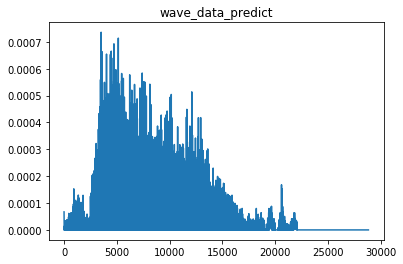

NameError: name 'Y_wave' is not defined

In [24]:
test = np.load("test_wave.npy")

plt.figure(1)
plt.title('wave_data_predict')
plt.plot(test)
plt.show()

plt.figure(1)
plt.title('wave_data_org')
plt.plot(Y_wave[0])
plt.show()

In [25]:
np.array(test_boolean).reshape(max_length)

NameError: name 'test_boolean' is not defined

In [26]:
np.save("test_boolean.npy", test_boolean)

NameError: name 'test_boolean' is not defined

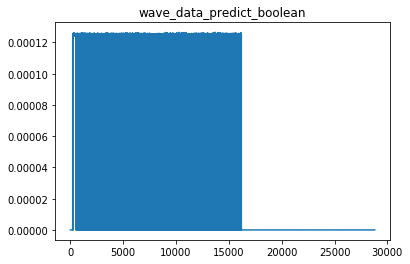

NameError: name 'Y_boolean' is not defined

In [27]:
test_boolean = np.load("test_boolean.npy")

plt.figure(1)
plt.title('wave_data_predict_boolean')
plt.plot(test_boolean)
plt.show()

plt.figure(1)
plt.title('wave_data_org')
plt.plot(Y_boolean[0])
plt.show()

[  9.46338452e-10   9.65994840e-10   1.09168419e-09 ...,   9.57508184e-10
   9.40787226e-10   1.04098419e-09]


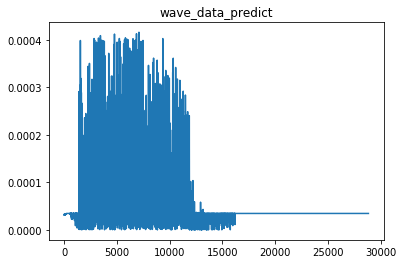

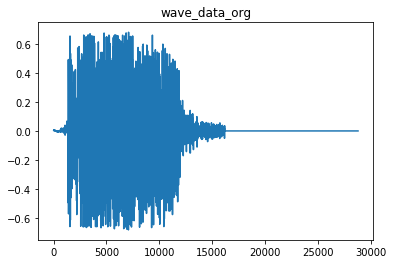

In [30]:
plt.figure(1)
plt.title('wave_data_predict')
plt.plot(test_boolean)
plt.show()

plt.figure(1)
plt.title('wave_data_org')
plt.plot(Y_wave[0])
plt.show()

In [ ]:
wavfile.write("test.wav", 44100, np.array(test))

In [ ]:
for i in np.array(Y[0]):
    print(i)